In [1]:
!pip install soundfile

In [2]:
import os
import numpy as np
import pandas as pd
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt

In [3]:
train_path = '../input/train/train/'
test_path = '../input/test/test/'

In [4]:
filename = 'de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment1.flac'

In [5]:
data, samplerate = sf.read(train_path+filename)

In [6]:
data

array([-0.03903198, -0.03997803, -0.05319214, ..., -0.00836182,
        0.01141357,  0.01940918])

Text(0.5, 0, 'Time [sec]')

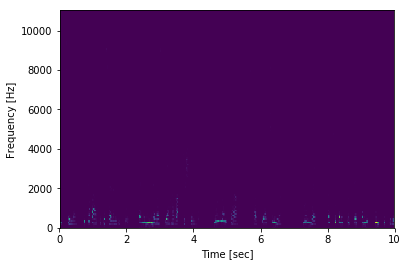

In [7]:
freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
plt.pcolormesh(time, freq, Sxx)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Text(0.5, 0, 'Time [sec]')

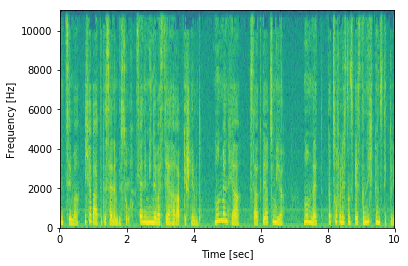

In [8]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [9]:
data

array([-0.03903198, -0.03997803, -0.05319214, ..., -0.00836182,
        0.01141357,  0.01940918])

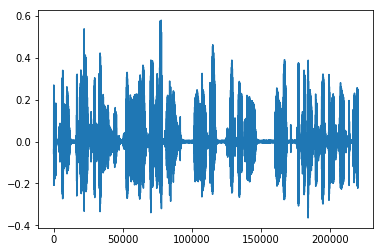

In [10]:
plt.plot(data)

In [11]:
label = []
for filename in os.listdir(train_path)[:1000]:
    label.append(filename[:2])

In [12]:
gender = []
for filename in os.listdir(train_path)[:1000]:
    gender.append('male' if filename[3:4]=='m' else 'female')

In [13]:
sound_type = []
for filename in os.listdir(train_path)[:1000]:
    sound_type.append('noise' if 'noise' in filename else 'pitch' if 'pitch' in filename else 'speed' if 'speed' in filename else 'notype')

In [14]:
file = []
for filename in os.listdir(train_path)[:1000]:
    file.append(filename)

In [15]:
series = []
length = []
for filename in os.listdir(train_path)[:1000]:
    flac, samplerate = sf.read(train_path+filename)
    series.append(flac)
    length.append(samplerate)

In [16]:
data = {'Gender':gender,
        'filename':file,
           'Sound_type': sound_type,
       'language':label,
       'series': series,
       'length': length}

In [17]:
df = pd.DataFrame(data)

In [18]:
df

,Gender,filename,Sound_type,language,series,length
0,male,es_m_f7d959494477e5e7e33d4666f15311c9.fragment...,noise,es,"[-0.123260498046875, -0.127716064453125, -0.13...",22050
1,female,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...,noise,es,"[-0.00921630859375, -0.014404296875, -0.013854...",22050
2,female,en_f_31da456c78eb5cf86d2b447e2fbfb736.fragment...,noise,en,"[0.0048828125, 0.00579833984375, 0.00640869140...",22050
3,female,de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment...,noise,de,"[-0.010528564453125, -0.008392333984375, -0.00...",22050
4,male,es_m_534a0cf6f6aea8e35667a9147d2d0f8d.fragment...,speed,es,"[-0.00164794921875, -0.002166748046875, -0.001...",22050
5,male,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,pitch,de,"[-0.051513671875, -0.0697021484375, -0.0617370...",22050
6,female,es_f_1d27c6d589eeff17973ffd0b7a77a70a.fragment...,pitch,es,"[-0.02490234375, -0.046600341796875, -0.042144...",22050
7,male,es_m_9d8242673cefba8a44695b3d4f4ddd3f.fragment...,speed,es,"[-0.0089111328125, 0.0125732421875, 0.01583862...",22050
8,male,es_m_4d7e5bf6deb997d71eb46ae46043c3db.fragment...,noise,es,"[-0.01318359375, 0.003692626953125, 0.00997924...",22050
9,male,es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment...,noise,es,"[0.016937255859375, 0.023651123046875, -0.0150...",22050


In [19]:
len(df)

1000

In [20]:
df_male_en = df[(df['Gender']=='male') & (df['language']=='en')].reset_index(drop=True)
df_male_es = df[(df['Gender']=='male') & (df['language']=='es')].reset_index(drop=True)
df_male_de = df[(df['Gender']=='male') & (df['language']=='de')].reset_index(drop=True)
df_female_en = df[(df['Gender']=='female') & (df['language']=='en')].reset_index(drop=True)
df_female_es = df[(df['Gender']=='female') & (df['language']=='es')].reset_index(drop=True)
df_female_de = df[(df['Gender']=='female') & (df['language']=='de')].reset_index(drop=True)

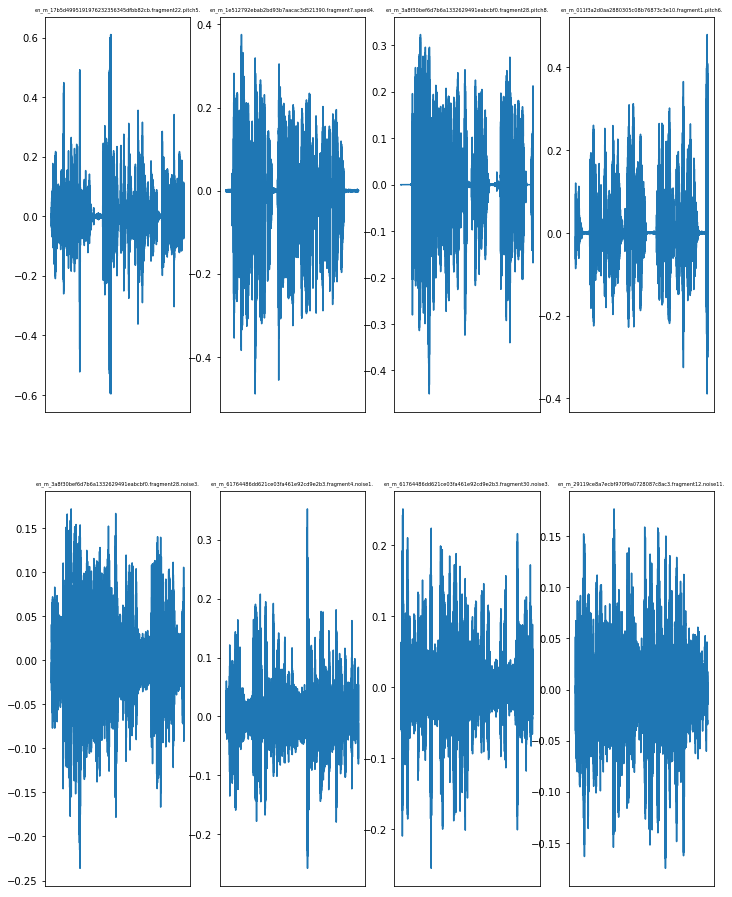

In [21]:
fig, ax = plt.subplots(2, 4, figsize = (12, 16))
for i in range(8):
    ax[i//4, i%4].plot(df_male_en['series'][i])
    ax[i//4, i%4].set_title(df_male_en['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

The first 8 male with espanol language waveform

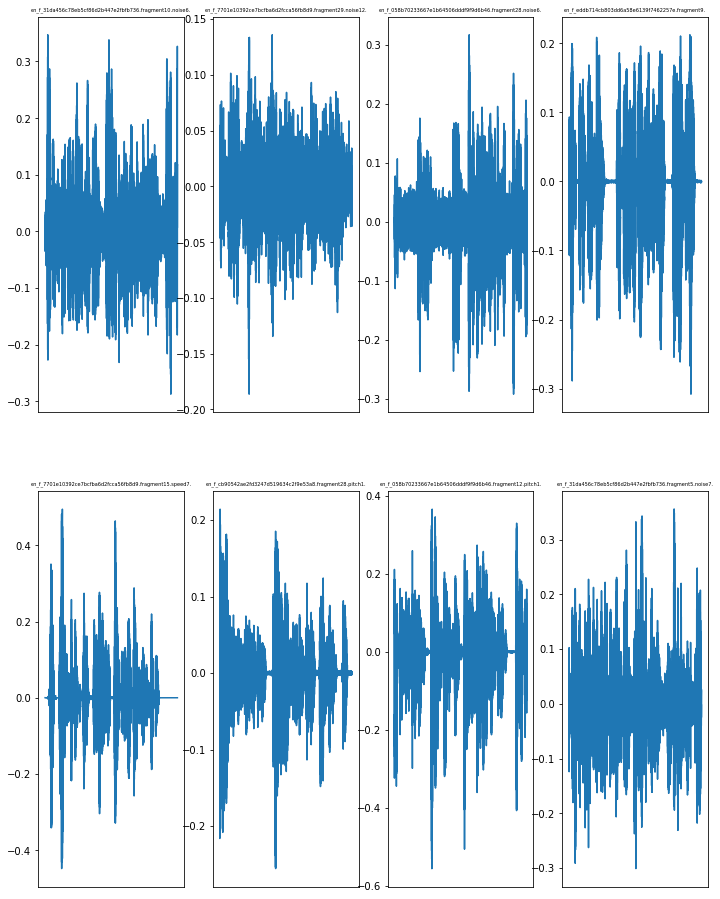

In [22]:
fig, ax = plt.subplots(2, 4, figsize = (12, 16))
for i in range(8):
    ax[i//4, i%4].plot(df_female_en['series'][i])
    ax[i//4, i%4].set_title(df_female_en['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

In [23]:
df.columns

Index(['Gender', 'filename', 'Sound_type', 'language', 'series', 'length'], dtype='object')

In [24]:

df.dtypes

Gender        object
filename      object
Sound_type    object
language      object
series        object
length         int64
dtype: object

In [25]:
df_lang = df

In [26]:
df_lang.language.replace({'en':1,'es':2,'de':3},inplace=True)

df_lang.language.unique()


array([2, 1, 3])

In [27]:
df_lang

,Gender,filename,Sound_type,language,series,length
0,male,es_m_f7d959494477e5e7e33d4666f15311c9.fragment...,noise,2,"[-0.123260498046875, -0.127716064453125, -0.13...",22050
1,female,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...,noise,2,"[-0.00921630859375, -0.014404296875, -0.013854...",22050
2,female,en_f_31da456c78eb5cf86d2b447e2fbfb736.fragment...,noise,1,"[0.0048828125, 0.00579833984375, 0.00640869140...",22050
3,female,de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment...,noise,3,"[-0.010528564453125, -0.008392333984375, -0.00...",22050
4,male,es_m_534a0cf6f6aea8e35667a9147d2d0f8d.fragment...,speed,2,"[-0.00164794921875, -0.002166748046875, -0.001...",22050
5,male,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,pitch,3,"[-0.051513671875, -0.0697021484375, -0.0617370...",22050
6,female,es_f_1d27c6d589eeff17973ffd0b7a77a70a.fragment...,pitch,2,"[-0.02490234375, -0.046600341796875, -0.042144...",22050
7,male,es_m_9d8242673cefba8a44695b3d4f4ddd3f.fragment...,speed,2,"[-0.0089111328125, 0.0125732421875, 0.01583862...",22050
8,male,es_m_4d7e5bf6deb997d71eb46ae46043c3db.fragment...,noise,2,"[-0.01318359375, 0.003692626953125, 0.00997924...",22050
9,male,es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment...,noise,2,"[0.016937255859375, 0.023651123046875, -0.0150...",22050


In [28]:
df_l=df_lang

In [29]:
df_l

,Gender,filename,Sound_type,language,series,length
0,male,es_m_f7d959494477e5e7e33d4666f15311c9.fragment...,noise,2,"[-0.123260498046875, -0.127716064453125, -0.13...",22050
1,female,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...,noise,2,"[-0.00921630859375, -0.014404296875, -0.013854...",22050
2,female,en_f_31da456c78eb5cf86d2b447e2fbfb736.fragment...,noise,1,"[0.0048828125, 0.00579833984375, 0.00640869140...",22050
3,female,de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment...,noise,3,"[-0.010528564453125, -0.008392333984375, -0.00...",22050
4,male,es_m_534a0cf6f6aea8e35667a9147d2d0f8d.fragment...,speed,2,"[-0.00164794921875, -0.002166748046875, -0.001...",22050
5,male,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,pitch,3,"[-0.051513671875, -0.0697021484375, -0.0617370...",22050
6,female,es_f_1d27c6d589eeff17973ffd0b7a77a70a.fragment...,pitch,2,"[-0.02490234375, -0.046600341796875, -0.042144...",22050
7,male,es_m_9d8242673cefba8a44695b3d4f4ddd3f.fragment...,speed,2,"[-0.0089111328125, 0.0125732421875, 0.01583862...",22050
8,male,es_m_4d7e5bf6deb997d71eb46ae46043c3db.fragment...,noise,2,"[-0.01318359375, 0.003692626953125, 0.00997924...",22050
9,male,es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment...,noise,2,"[0.016937255859375, 0.023651123046875, -0.0150...",22050


In [30]:
series2 = []
for r in series:
    series2.append(r[:22500])

In [31]:
for s in series2:
    print(s.shape)

(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(

In [32]:
len(series2)

1000

In [33]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

y=df_lang.language
files = np.array(series2)
y = np.array(y)
paths_train, paths_valid, y_train, y_valid = train_test_split(files, y, test_size = 0.2, random_state=45)
print(paths_train.shape, y_train.shape, paths_valid.shape, y_valid.shape)

(800, 22500) (800,) (200, 22500) (200,)


In [34]:
files[1].shape

(22500,)

In [35]:
df_l.values

array([['male',
        'es_m_f7d959494477e5e7e33d4666f15311c9.fragment11.noise6.flac',
        'noise', 2,
        array([-0.1232605 , -0.12771606, -0.13061523, ..., -0.0838623 ,
       -0.07040405, -0.05612183]),
        22050],
       ['female',
        'es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment19.noise1.flac',
        'noise', 2,
        array([-0.00921631, -0.0144043 , -0.01385498, ..., -0.00967407,
       -0.00973511, -0.00643921]),
        22050],
       ['female',
        'en_f_31da456c78eb5cf86d2b447e2fbfb736.fragment10.noise6.flac',
        'noise', 1,
        array([0.00488281, 0.00579834, 0.00640869, ..., 0.05667114, 0.02947998,
       0.00765991]),
        22050],
       ...,
       ['male',
        'en_m_29119ce8a7ecbf970f9a0728087c8ac3.fragment21.speed6.flac',
        'speed', 1,
        array([-1.18560791e-01, -1.63055420e-01, -1.36932373e-01, ...,
       -3.05175781e-05,  0.00000000e+00,  0.00000000e+00]),
        22050],
       ['female',
        'en_f_17211c49a9

In [36]:
#svm classifier

from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC()
scores = cross_val_score(clf, files, y, cv=4)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Accuracy: 0.34 (+/- 0.00)


In [37]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
score2 = cross_val_score(clf2, files, y, cv=4)
score2
print("Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))

Accuracy: 0.35 (+/- 0.03)


In [38]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(random_state=0)
score3 = cross_val_score(clf3, files, y, cv=4)
score3
print("Accuracy: %0.2f (+/- %0.2f)" % (score3.mean(), score3.std() * 2))

Accuracy: 0.35 (+/- 0.11)


In [39]:
# import the required module from scikit learn
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# Implementing classification model- using KNeighborsClassifier

# Instantiate the estimator
clf_knn =  KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(clf_knn, files, y, cv=4)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.36 (+/- 0.10)
